Tyler D. French, Andre J. Jaberi

In [1]:
import matplotlib.pyplot as plt
import glob
import random

path = "images_processed_2/lungs/"
filenamesC = glob.glob("images_processed_2/lungs/CO_*.png")
filenamesP = glob.glob("images_processed_2/lungs/Pn_*.png")
filenamesN = glob.glob("images_processed_2/lungs/No_*.png")
filenames = [random.choice(filenamesN), random.choice(filenamesC), random.choice(filenamesP)] 
filenames = ["No_781_450_1.png",
             "CO_13_10_0.png",
             "Pn_643_85_1.png"]

names = ["Normal Lung", "COVID-19", "Pneumothorax"]

images = []
for filename in filenames:
    images.append(plt.imread(path + filename))
    
figurePath = "Figures/"
    
    

In [2]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Initialize empty arrays to hold blocks of data

i1 = []; i2 = []; i3 = []; i4 = []; i5 = []
freqFeaturesAll = []

for imgi in range(len(images)):

    blocks = []; blocks_dct = []; blocks_dctr = []; blocks_idct = []
    
    freqFeatures = []
    nFreqs = 400
    
    image = images[imgi]
    # Iterate through rows and columns
    for i in range(4):
        for j in range(2):

            # Select current block
            image = rgb2gray(image)
            block = image[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)]
            block_dct = dct(dct(block, axis=0),  axis=1)
            flatblock = block_dct.flatten()
            level_25th = np.argsort(abs(flatblock))[::-1][400:]
            
            # Safe Frequency Features for output
   
            
            new_block = np.zeros(flatblock.shape)
            new_block[level_25th] = flatblock[level_25th]
            print(level_25th)
            
            freqFeatures.append(level_25th[:nFreqs])
            freqFeatures.append(flatblock[level_25th][:nFreqs])
            
            reshaped = new_block.reshape(np.shape(block_dct))
            block_rebuilt = idct(idct(reshaped, axis=0), axis=1)

            blocks.append(block)
            blocks_dct.append(block_dct)
            blocks_dctr.append(reshaped)
            blocks_idct.append(block_rebuilt)
    freqFeaturesAll.append(freqFeatures)

    # Initializing Viewing Arrays
    image_out = np.full((800, 350), 1.0)
    image_dct = np.full((800, 350), 0)
    image_dctr = np.full((800, 350), 0)
    image_idct = np.full((800, 350), 1.0)

    # Load data into viewing output image arrays
    for i in range(4):
        for j in range(2):
            ind = 2*i + j

            image_out[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks[ind]
            # Log scale included for display
            image_dct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dct[ind]) + 0.1)
            image_dctr[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dctr[ind]) + 0.1)
            image_idct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks_idct[ind]

    image_idct = np.round(256*image_idct/image_idct.max())
    image = np.round(256*image/image.max())
    diff = abs(image - image_idct)
    i1.append(image_out)
    i2.append(image_dct)
    i3.append(image_dctr)
    i4.append(image_idct)
    i5.append(diff)

[ 3505  3329  4209 ... 34088 18180 31834]
[ 4204  4902  6126 ... 16374 32408 27246]
[ 2839  3894  1438 ... 30898 29709 19654]
[ 1436  2809  2297 ... 20340 34539 23065]
[ 1775  2816  5260 ... 25598  4083 26234]
[  386  4907  1599 ... 12233 27412 23302]
[ 4210  4733  2988 ... 31939  9727  4171]
[ 7001  1943  5077 ... 18963 33697 26486]
[ 2983  2118  3337 ... 22127 30750 16408]
[ 4550  3505  1589 ... 25693 18563 16962]
[ 5262  2655  3684 ... 20872 17119 20746]
[ 2990   535  5261 ...  2147 20077 19730]
[ 3166  8588   380 ... 20078 31403 34824]
[ 1595  2309  1431 ... 24076  7453  7477]
[ 5451  1592  4027 ... 18593 24247 25706]
[ 2316   759   185 ... 25839 26207 20369]
[ 3528  2115   716 ...  4670 29976 18321]
[ 7881   543  5800 ... 26056 28404  9211]
[ 3702  1431  5263 ... 33754 31489  2961]
[ 1256  5785  6480 ... 27966 27060 32717]
[ 1450  5609  3352 ... 20108 33396 18060]
[ 1054   197  1605 ...  3495 12592 26583]
[ 1402  3329   210 ... 34608 20053 15082]
[ 3503  5961  2285 ... 17381 12001

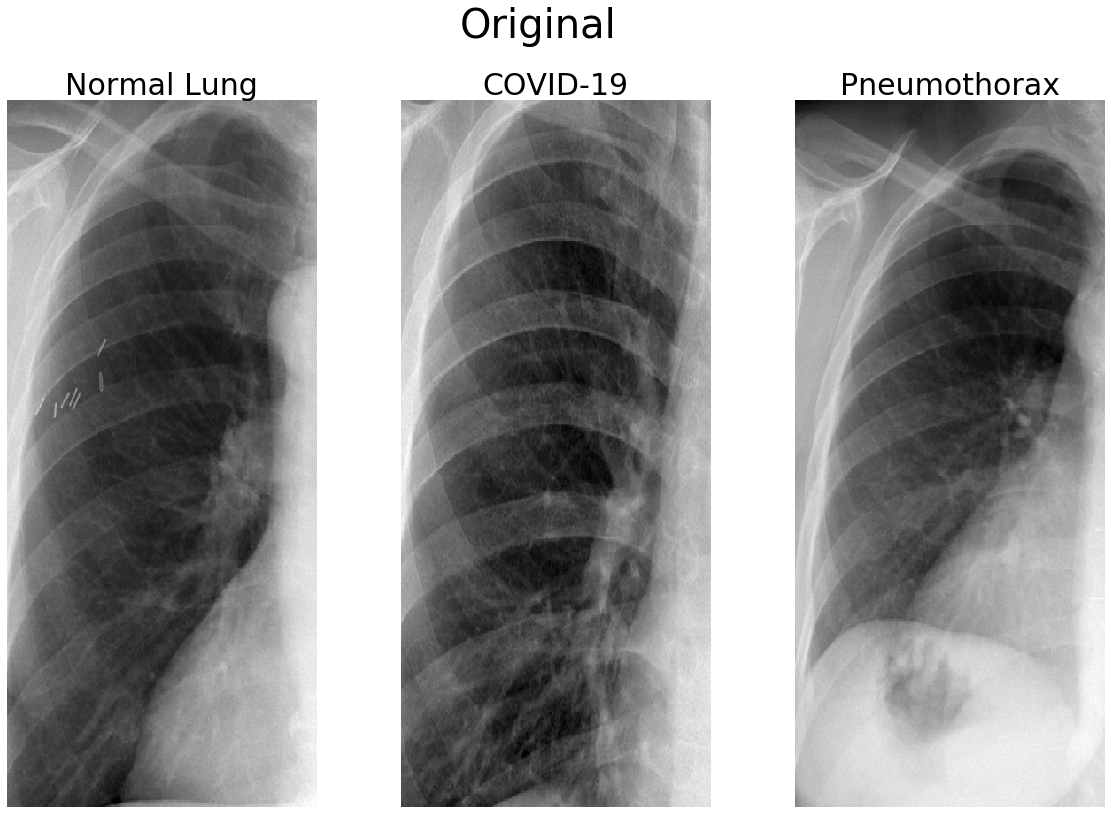

In [3]:
# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i1[i], cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Original", fontsize = 40)
figure = plt.gcf()
plt.savefig(figurePath + "Original.png")

plt.show()



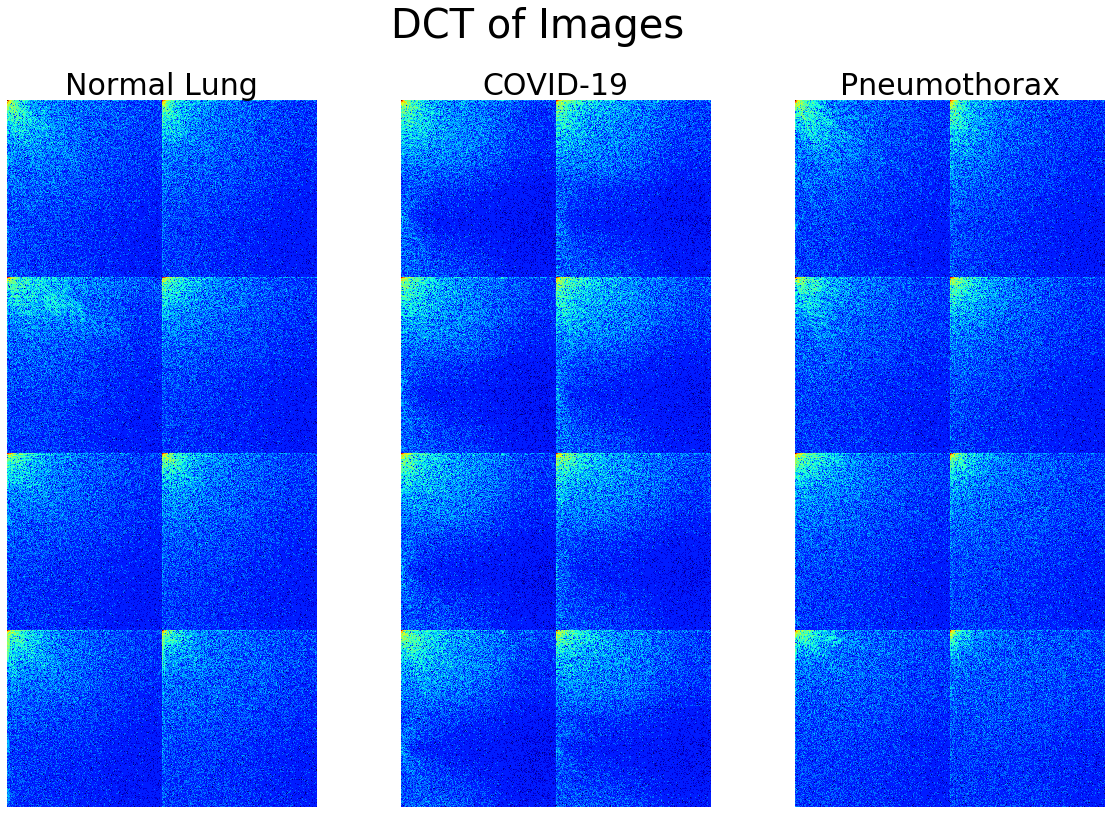

In [4]:
# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i2[i], cmap = 'jet')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT of Images", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "DCT.png")

plt.show()

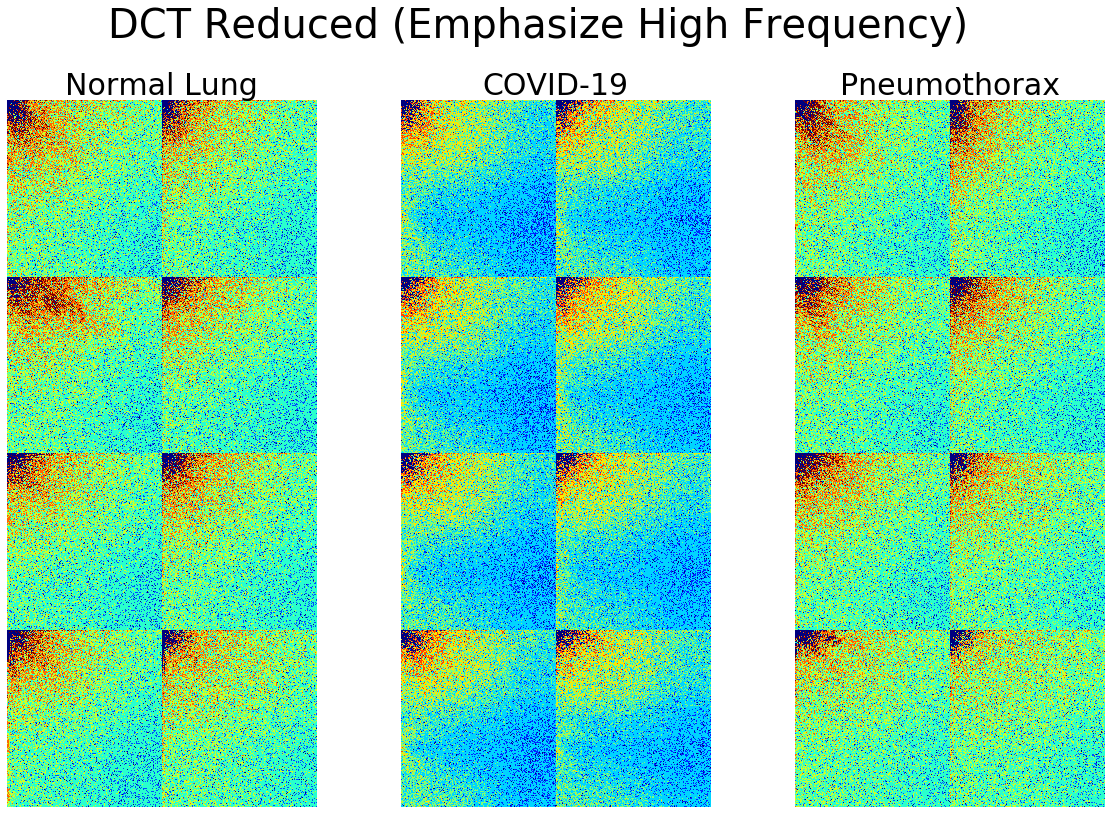

In [5]:
# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i3[i], cmap = 'jet')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced (Emphasize High Frequency)", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "DCTReduced.png")

plt.show()

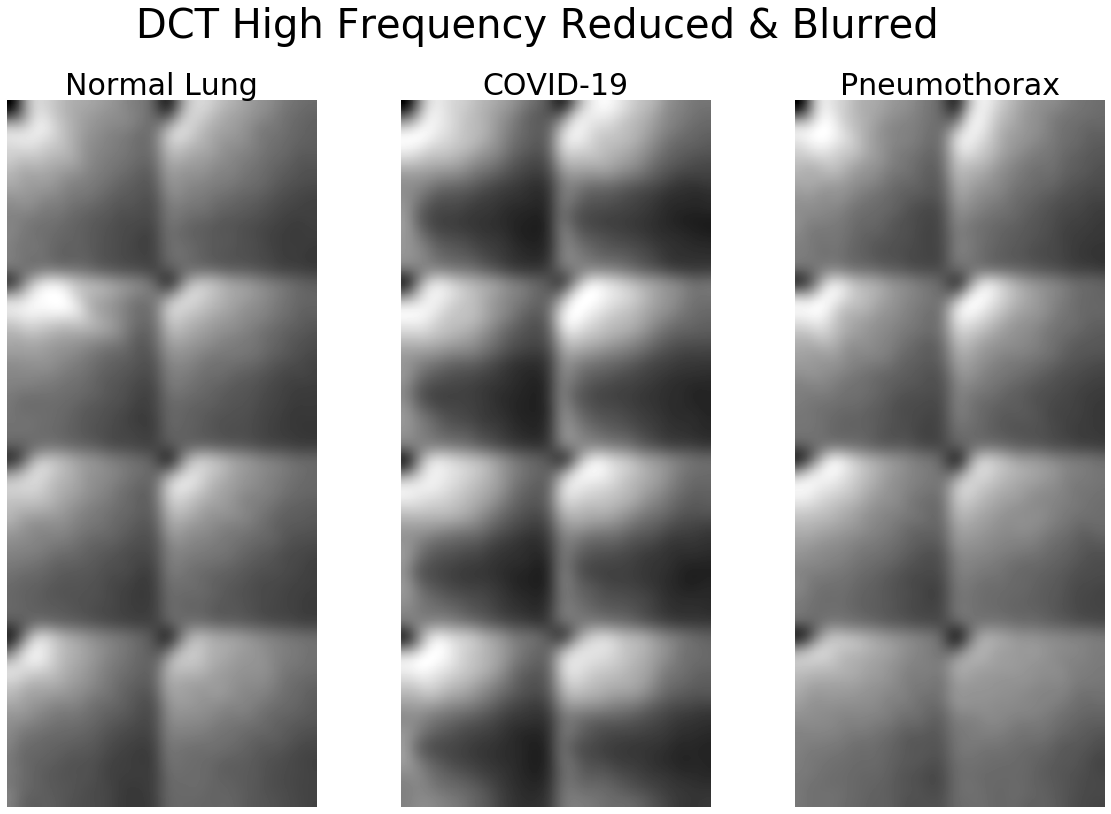

In [6]:
from scipy.ndimage import gaussian_filter
import cv2
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    im = np.round(256*(i3[i] - np.min(i3[i]))/(np.max(i3[i])-np.min(i3[i])))
    im2 = gaussian_filter(im, sigma = 10)
    #lap = cv2.Laplacian(im2,cv2.CV_64F)
    sob = sobel(im2)
    plt.imshow(im2, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT High Frequency Reduced & Blurred", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "DCTReducedBlurred.png")

plt.show()

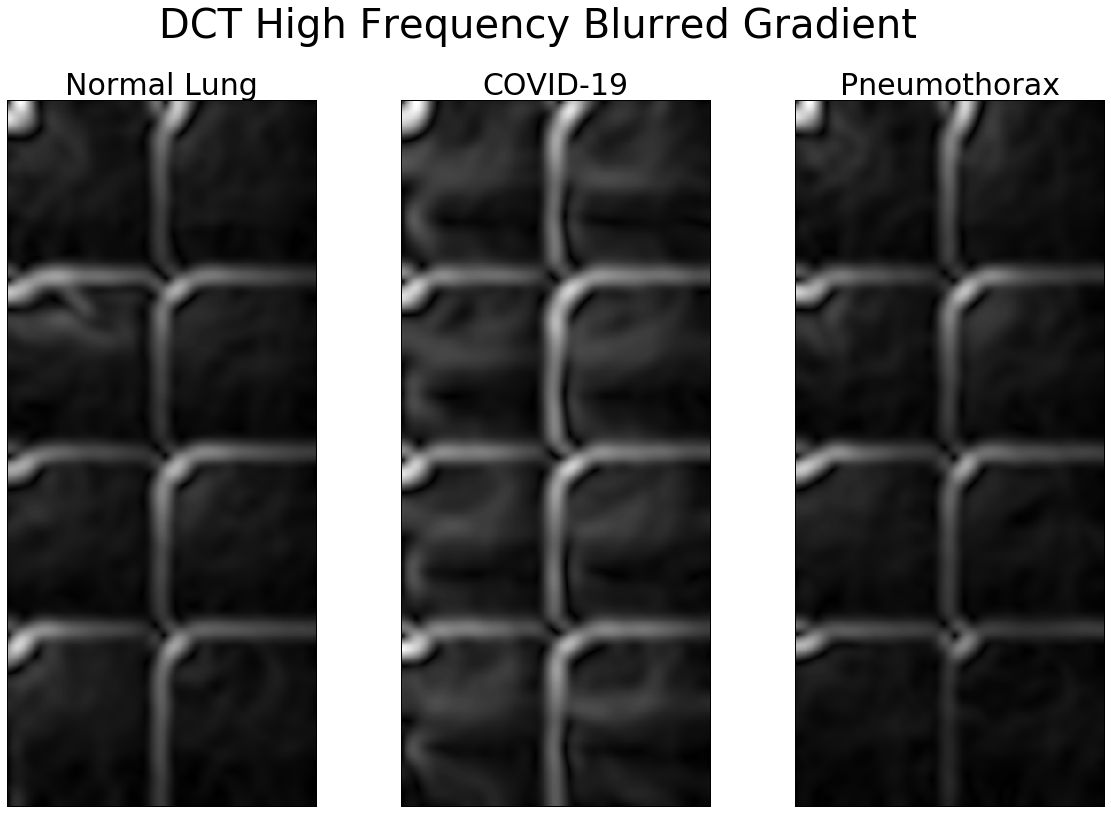

In [7]:
from scipy.ndimage import gaussian_filter
import cv2

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    im = np.round(256*(i3[i] - np.min(i3[i]))/(np.max(i3[i])-np.min(i3[i])))
    im2 = gaussian_filter(im, sigma = 10)
    #lap = cv2.Laplacian(im2,cv2.CV_64F)
    sob = sobel(im2)
    plt.imshow(sob, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT High Frequency Blurred Gradient", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "DCTReducedBlurredEdges.png")

plt.show()

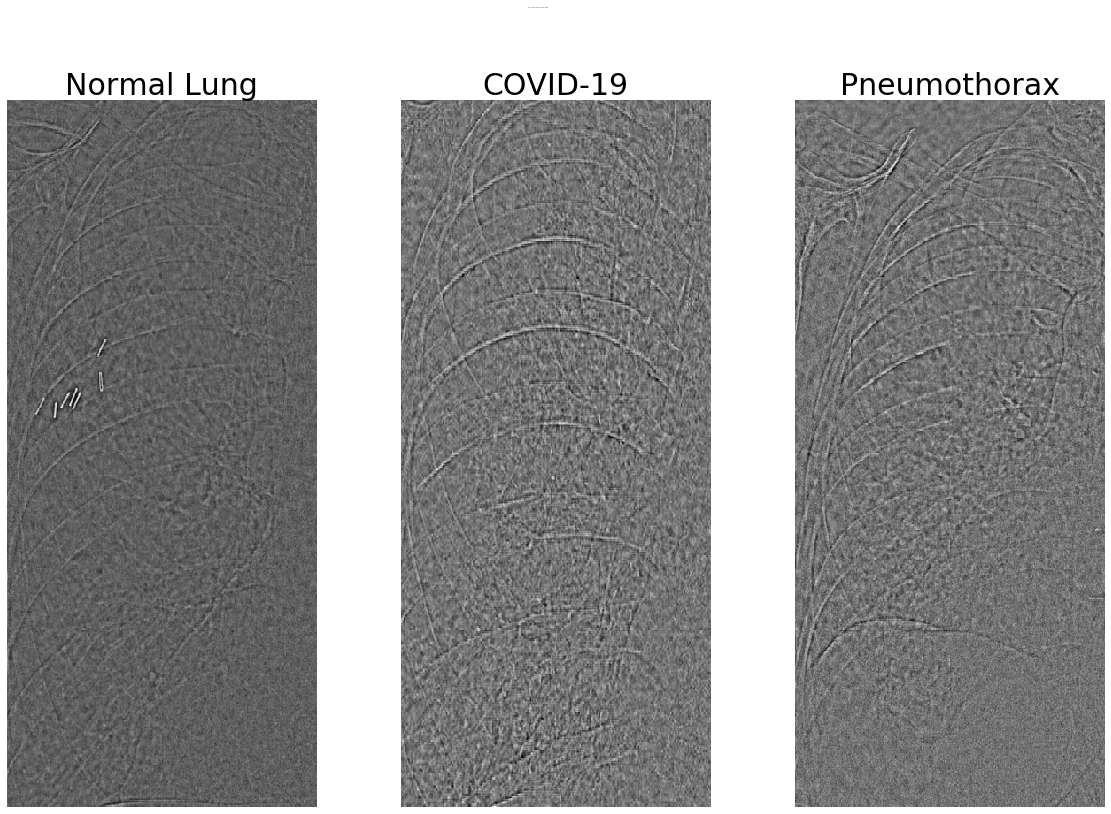

In [8]:
# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    plt.imshow(i4[i], cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Reconstruction of DCT Reduced Images", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "ReconstructedDCTReduced.png")

plt.show()

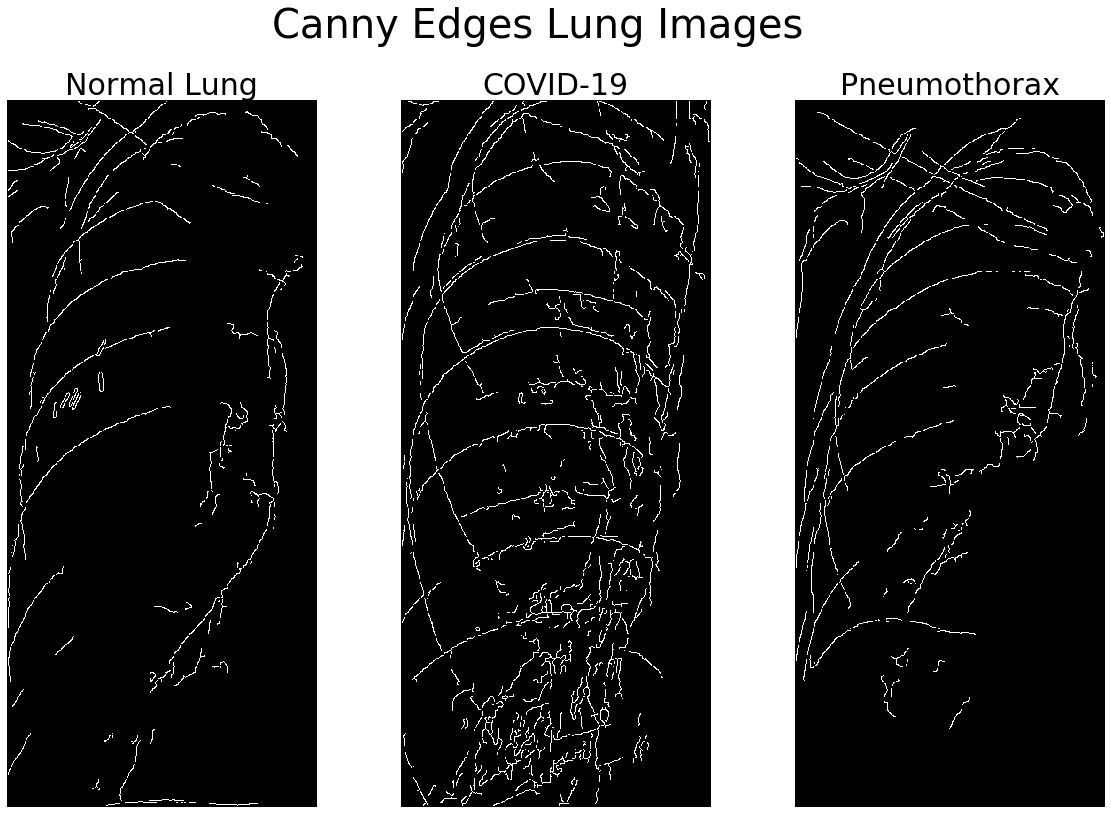

In [9]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    img_canny = feature.canny(i1[i], sigma = 1)
    img_sobel = sobel(i4[i])
    plt.imshow(img_canny, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Canny Edges Lung Images", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "CannyEdges.png")

plt.show()

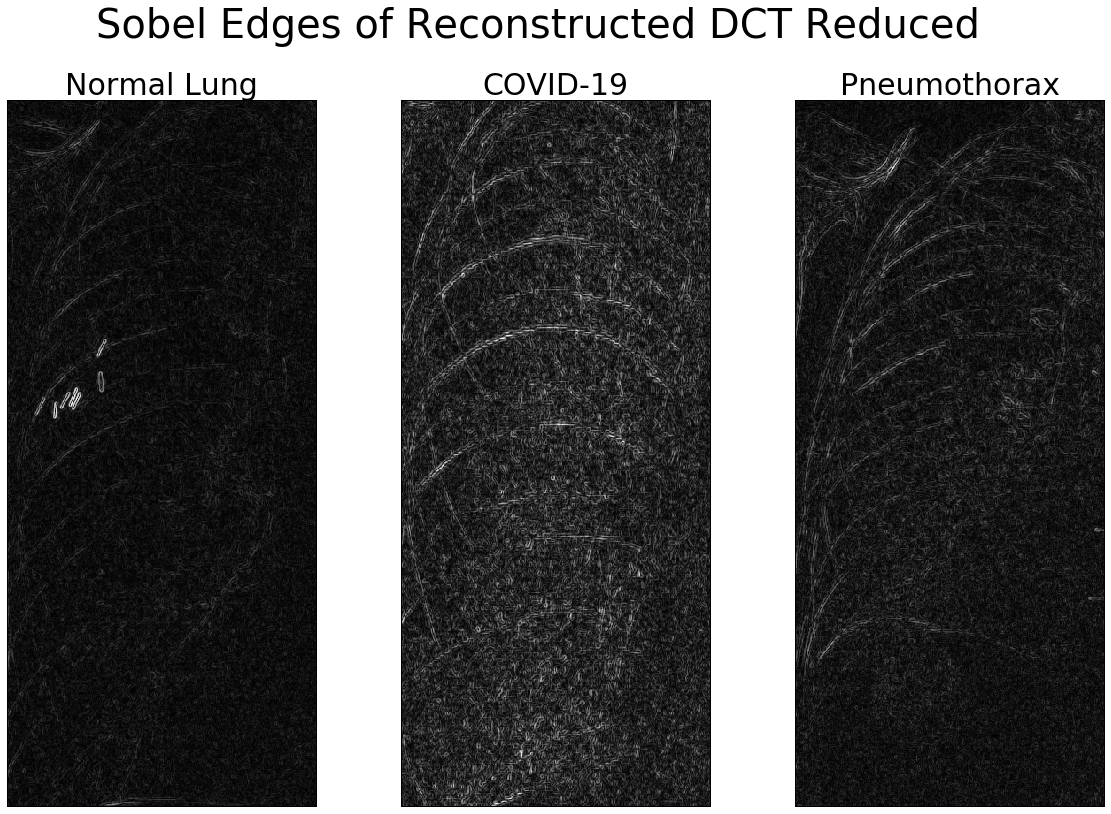

In [10]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    img_canny = feature.canny(i4[i], sigma = 5)
    img_sobel = sobel(i4[i])
    plt.imshow(img_sobel, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Sobel Edges of Reconstructed DCT Reduced", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "CannyDCTReduced.png")

plt.show()

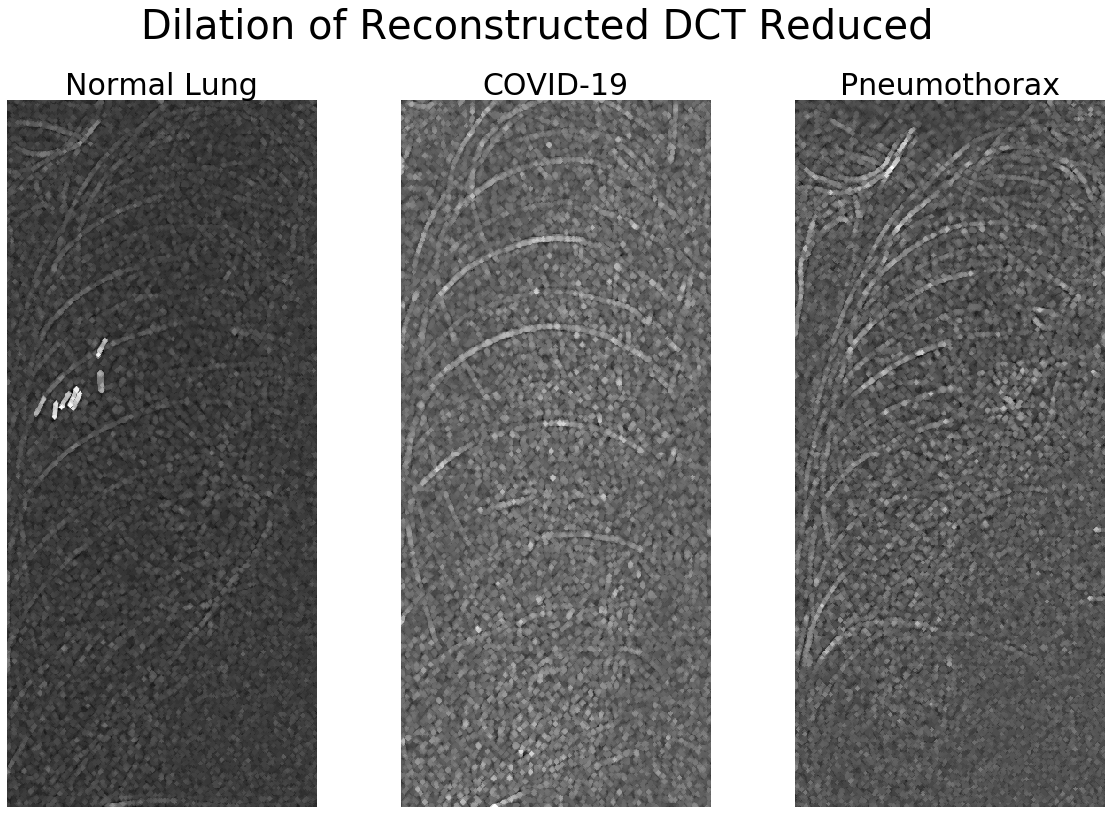

In [11]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray
import cv2

    

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    kernel = np.array([[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]], np.uint8)
    dilate = cv2.dilate(i4[i], kernel, iterations = 1)
    plt.imshow(dilate, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Dilation of Reconstructed DCT Reduced", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "DilationDCTReduced.png")

plt.show()

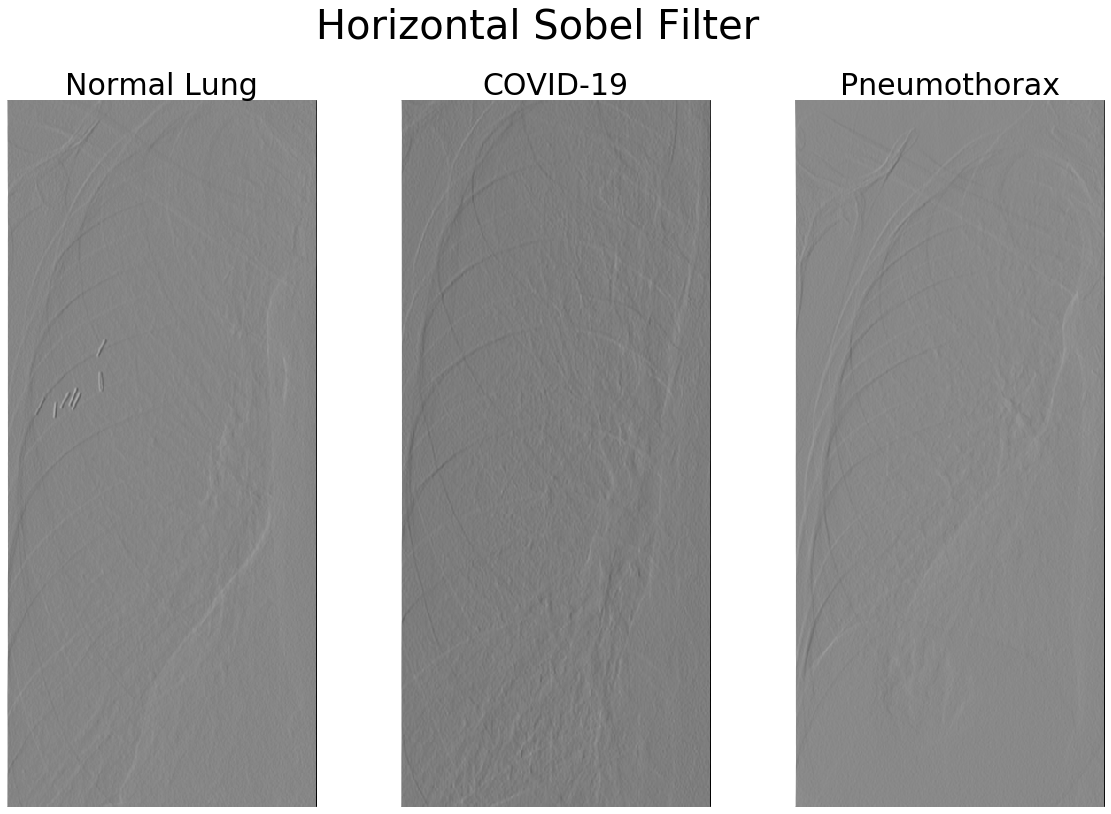

In [12]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Display Plots
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sx = ndimage.sobel(i1[i], axis=1, mode='constant')
    sy = ndimage.sobel(i1[i], axis=1, mode='constant')
    plt.imshow(256*(sx - np.min(sx))/(np.max(sx)-np.min(sx)), cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Horizontal Sobel Filter", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "HSobelDCTReduced.png")

plt.show()

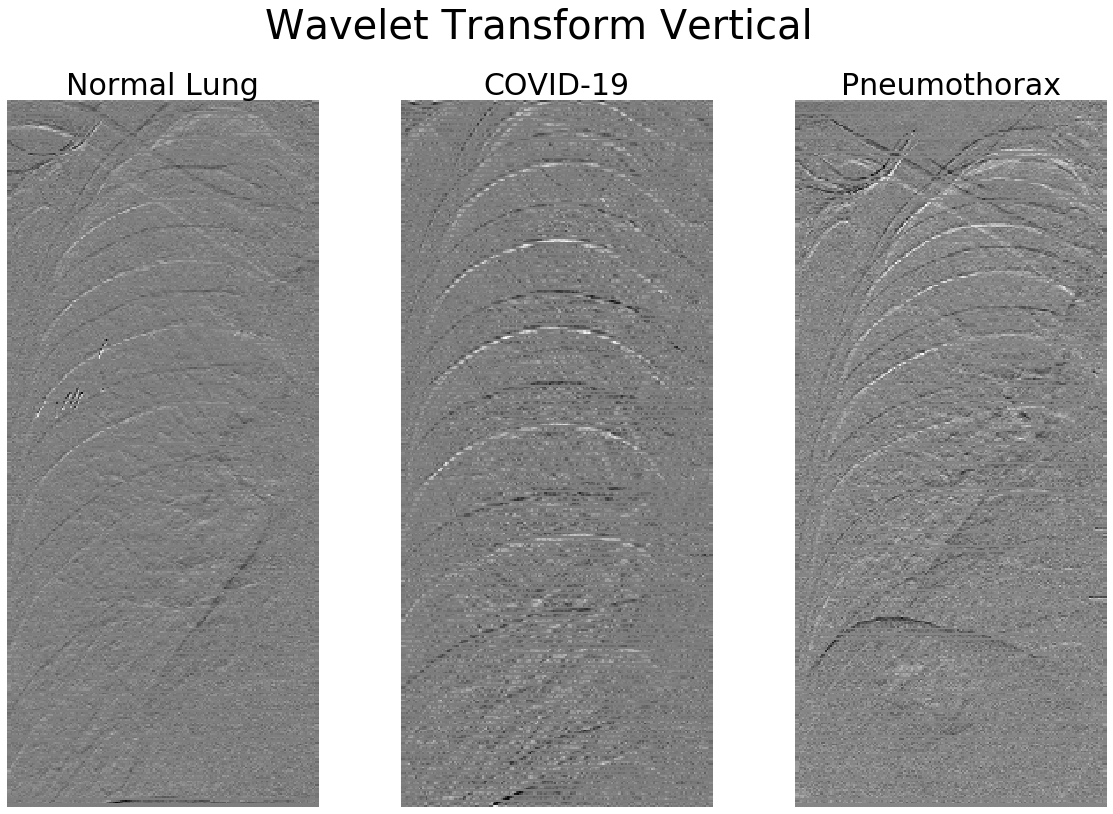

In [13]:
import pywt

plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    coeffs2 = pywt.dwt2(i1[i], 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    plt.imshow(LH, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Wavelet Transform Vertical", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "WaveletVertical.png")

plt.show()

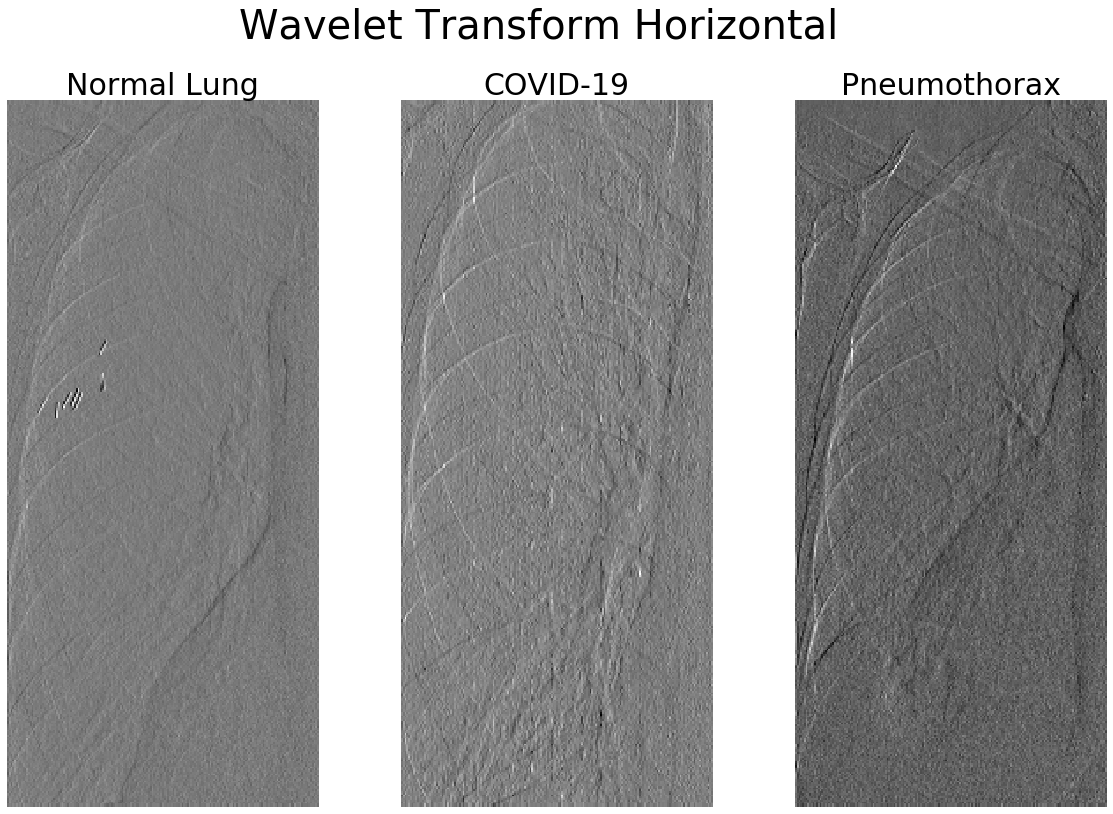

In [14]:
plt.figure(figsize=(20,13))
for i in range(3):
    plt.subplot(1, 3, i+1)
    coeffs2 = pywt.dwt2(i1[i], 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    plt.imshow(HL, cmap = 'gray')
    plt.title(names[i], fontsize = 30)
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Wavelet Transform Horizontal", fontsize = 40)

figure = plt.gcf()
plt.savefig(figurePath + "WaveletHorizontal.png")

plt.show()

In [15]:
import mahotas as mt

plt.figure(figsize=(20,13))
for i in range(3):
    textures = mt.features.haralick(np.round(256*(i1[i] - np.min(i1[i]))/(np.max(i1[i])-np.min(i1[i]))).astype(int))
    ht_mean = textures.mean(axis=0)
    print(ht_mean)


[ 6.28511443e-04  2.19271319e+01  9.96655310e-01  3.27937207e+03
  3.01006874e-01  2.17052948e+02  1.30955611e+04  8.58264776e+00
  1.12581930e+01  4.86111238e-04  3.27874885e+00 -4.74967316e-01
  9.99503196e-01]
[ 5.97877504e-04  2.96014979e+01  9.95083975e-01  3.01211983e+03
  2.97103863e-01  2.08873211e+02  1.20188778e+04  8.60171755e+00
  1.15957900e+01  4.79340639e-04  3.45542014e+00 -4.51382772e-01
  9.99257362e-01]
[ 4.68661162e-04  1.88782000e+01  9.97723975e-01  4.14732550e+03
  3.10889732e-01  2.71770101e+02  1.65704238e+04  8.79710960e+00
  1.15354440e+01  5.10446266e-04  3.21448959e+00 -4.95013136e-01
  9.99723899e-01]


<Figure size 1440x936 with 0 Axes>